# Topic 15: Linear Regression

Linear regression is the most commonly used machine learning algorithm.

The basic concept is quite simple, but there are many variations and extensions upon the ideas, and many implementations for performing linear regression.

We will see a summary of these techniques in this topic.  For those who are interested in data science as a carreer, there is a lot more to learn!

Here is an overview:

* The basic idea

* Definitions and Terms

* Simple Linear Regression

* Building Larger Test Cases

* Polynomial Linear Regressions

* Building Larger Test Cases

* Using Sklearn

* Multiple Linear Regressions (Multiple Inputs)

* Sparse Data

But first, we will set up the Notebook:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In a previous lecture, I said I would explain the purpose of the '%maplotlib inline' line of text.  This is a magic command in Jupyter which links the charts and plots from matplotlib to the Jupyter Notebook, so that the charts appear in the cell outputs.

## The Basic Idea

Suppose we have a sequence of data values, and we would like to determine if there is a simple mathematical relationship between the values.  _For example, the relationship between wind speed and measured wind-chill factor_.

Or suppose the sequence represents the results achieved with application of a given input value. _The example several sources used was number of hours studied as input and the grade received as output_.

Perhaps we would like to then estimate, for a different input value, what output value should be expected?

In the following, we have a set of output values for various input values:

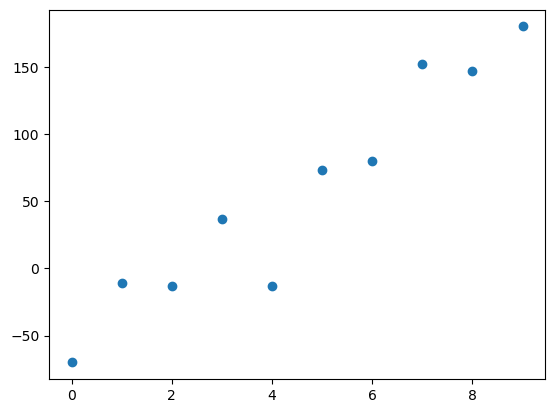

In [2]:
intro_x = range(0, 10)
intro_y = [-70, -11, -13, 37, -13, 73, 80, 152, 147, 180]
plt.scatter(intro_x, intro_y)
plt.show()

One common approach is to find the _best line_ that "fits" our data:

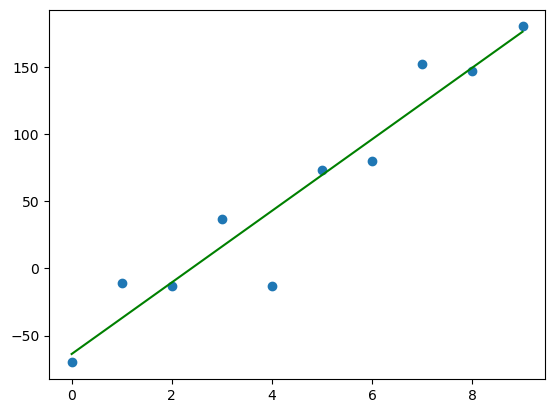

In [3]:
intro_z = np.polyfit(intro_x, intro_y, 1)
intro_p = np.poly1d(intro_z)
plt.scatter(intro_x, intro_y)
plt.plot(intro_x, intro_p(intro_x), 'g-')
plt.show()

Using the least-squares fit, the green line provides the best line approximation of the data.  Not all of the points fit exactly on the line (and in fact there is no straight line that exactly holds all of the points).  The distance between any point and the line is the _error_ for that point, and the error for the whole line is the sum of the squares of the errors for every point.  Any other single line that we would draw would have a larger error.

sklearn has a built-in method which computes the _mean squared error_, so we can get a measure of how well the line fits the data.  Many times, we don't really want the mean squared error, but the square root of that value (so that the number uses the same units as the data).

In [4]:
print(f'{np.sqrt(mean_squared_error(intro_p(intro_x), intro_y)):.2f}')

23.29


Using this line, we could estimate the output for any input.  So, for example, if the input was 1.5, the output would be approximately -24 (I just eyeballed this from the graph!).

We could also estimate the output if the input were 10, although this is beyond the range of our input data.  If we look too far beyond the range of our data, that output value may be suspect!  There may be other consideration that would limit the results.  For example, if we were estimating the grade received based on study time spent, we might, if we put in a large enough study time, estimate a grade of 220%, or for the crop example, if we put in a low enough amount of water expect a negative size of crops!  However, using an input value of 10 is close to our data range, so we would expect the prediction to be reasonable.

There is one other point to cover about our plots:  I usually end the cells containing a plot with the command 'plt.show()'.  This is not really required, as you can see here:

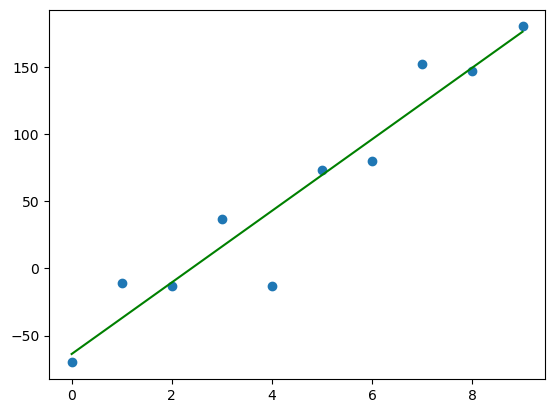

In [5]:
plt.scatter(intro_x, intro_y)
plt.plot(intro_x, intro_p(intro_x), 'g-')

As you can see, the plot still draws.  However, look at that line, '[<matplotlib.lines.Line2D at ...>]'.  What is that all about?  Usually Jupyter prints out the last expression or last result of the cell, then if there was a plot, it prints that.  So we get those ugly lines in our Notebook.  By ending a cell containing a plot with 'plt.show()', this removes that text.

With this introduction, let's define some terms:

## Definitions and Terms

For the simplest linear regression, we are trying to fit the data to a line.

The equation for a line is: $ y = m * x + b $.

In that equation:

* _x_ is an input value,
* _y_ is the associated output value,
* _m_ is the slope of the line, and
* _b_ is the intercept, which is where the line crosses the y-axis (where x == 0).

The goal of simple linear regression is to compute the _m_ and _b_ values given the training set of input values and output values.

For our example above, _m_ = 26.64, and _b_ is -63.69.

While most of the math world calls _m_ the _slope_, in the machine learning community, this is often called the _regression coefficient_.

_x_ is called the _input variable_.  Alternate names are _independent variable_, _predictor variable_, or _feature_.

_y_ is called the _output variable_.  Alternate names are _dependent variable_, _predicted variable_, or _target_.

A _prediction_ is the value that the linear regression model computes for a given input value.  Sometimes we pass an array of input values, and receive an array of the corresponding output values.  In this case _prediction_ refers to the whole array of output values.

An _outlier_ is an unexpected value, a value that is far outside the expected range.  In the following, we add an outlier to the graph.  Since _x_ is a _range_, we can't really add a new element, so I've converted these to a Pandas Series, then concatenated a value which is an outlier:

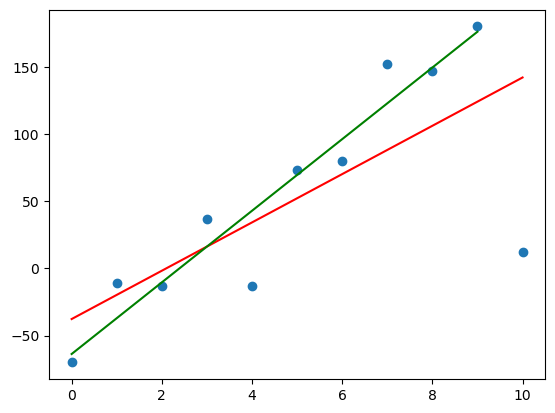

In [6]:
# Convert to a pair of Series:
outlier_x = pd.Series(intro_x)
outlier_y = pd.Series(intro_y)
# The outlier.  This must also be a pair of Series
x_add = pd.Series([10])
y_add = pd.Series([12])
# Concatenate the Series, so now we have the outlier with all of the other values
outlier_x = pd.concat([outlier_x, x_add], ignore_index=True)
outlier_y = pd.concat([outlier_y, y_add], ignore_index=True)
# Do the math:
outlier_z = np.polyfit(outlier_x, outlier_y, 1)
# Turn this into an evaluator
outlier_p = np.poly1d(outlier_z)
# Generate the plot
plt.scatter(outlier_x, outlier_y)
plt.plot(outlier_x, outlier_p(outlier_x), 'r-')
plt.plot(intro_x, intro_p(intro_x), 'g-')
plt.show()

The green line was the original solution, the red line shows the solution with this outlier included.  You can see how the one value really skews the line!  Consequently, we can see that with linear regression, it is important that we clean the data, removing any outliers, or samples with missing values, from the dataset.

We can also look at the mean squared error for the red line:

In [7]:
print(f'{np.sqrt(mean_squared_error(outlier_p(outlier_x), outlier_y)):.2f}')

52.42



The general form of the equation for the regression is

$$ y = \Omega_0 + \Omega_1 x^1 + \Omega_2 x^2 ... \Omega_n x^n $$

The _degree_ of the polynomial is the largest exponent of the input variable.  For a line, the degree would be 1, but for a parabola (for example), the degree would be 2, and so on.  The $\Omega$ values are the _coefficients_ of the equation, and any of these may be 0 (except for the coefficient for the largest exponent).

One interesting thing to note: In mathematics, we would normally write the higher-order terms on the left and the lower-order terms on the right.  In data analytics, they reversed this convention!

## Simple Linear Regression

There are several tools in the Anaconda/Miniconda space that can perform linear regression.  Later we will be using _LinearRegression_ from scikit_learn, but for simple linear regressions, many people prefer the solution in Numpy, _polyfit_:

* _polyfit_ is more elegant,
* _polyfit_ is easier to learn, new users find _LinearRegression_ more confusing.
* _polyfit_ seems to be more stable.  _LinearRegression_ changes much more frequently.  If you build a solution using _LinearRegression_, you may find that the code is updated, so your solution is out-of-date.

In a little bit, we will see examples of _LinearRegression_, so you can decide for yourself whether the above points apply to you!

Let's duplicate our earlier example, to explain the steps involved:

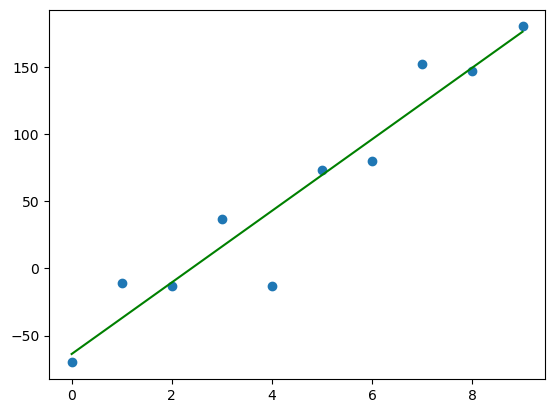

In [8]:
ex1_x = range(0, 10)
ex1_y = [-70, -11, -13, 37, -13, 73, 80, 152, 147, 180]
ex1_z = np.polyfit(ex1_x, ex1_y, 1)
ex1_p = np.poly1d(ex1_z)
plt.scatter(ex1_x, ex1_y)
plt.plot(ex1_x, ex1_p(ex1_x), 'g-')
plt.show()

* The first two lines are our sample data.  Normally, we would fetch (larger) datasets from .csv files, or other sources of data.  For this small example, we simply enter the values as a range and a Python array.  The *ex1_x* values are integers running from 0 through 9 (it stops before 10).  The *ex1_y* values are explicitly listed.

* The third line is the actual machine learning!  The _polyfit_ routine is passed an array of input values, an array of output values, and the degree of the desired polynomial.  In this case, the degree is 1, we are looking for a line.  The return value is an array, giving the coefficients of the polynomial.

In [9]:
ex1_z

array([ 26.64242424, -63.69090909])

* The fourth line turns the array into an object that computes that polynomial: given an input value, it computes the corresponding output value.

In [10]:
print(ex1_p)

 
26.64 x - 63.69


* The remaining lines generate the plot!

## Building Larger Test Cases

We entered a small test case by hand, and that was useful as an introduction.  But in many cases we might like to generate a larger test case, using random values.  sklearn has a tool, _datasets.make_regression_, that can create such test cases:

In [11]:
ex2_n_samples = 50
ex2_x, ex2_y, ex2_coef = datasets.make_regression(
    n_samples = ex2_n_samples,
    n_features = 1,
    n_informative = 1,
    noise = 5,
    coef = True,
    random_state = 0,
)

* *n_samples* indicates the number of samples in the dataset to be generated.
* *n_features* indicates the number of inputs.  We are currently using 1, but later we will use more.
* *n_informative* indicates the number of those inputs that are 'important', that really affect the output values.  Any non-informative inputs do not influence the output, but simply confuse the regressor.
* Not shown here, *n_targets* indicates the number of output values.  By default, the value is 1.
* _noise_ indicates how much randomness should be added, how scattered are the output values.
* _coef_ indicates whether the coefficients of the generator should be returned.  These indicate the formula used to create the points, and ideally these are the values that the regression should compute.
* *random_state* is the seed value for the random number generator.  By specifying this value, then subsequent runs will generate the same sequence of random values.  Hence, what you see in your Notebook should match the values in my Notebook.

Let's see what got generated:

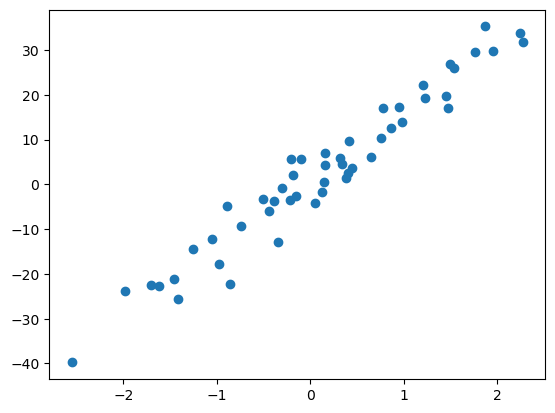

In [12]:
plt.scatter(ex2_x, ex2_y)
plt.show()

This looks like a reasonable collection of data points.  We could ask for more randomness, or fewer or more points, and so on.

We can look to see what the return value looks like:

In [13]:
ex2_x

array([[-0.85409574],
       [ 1.49407907],
       [-0.34791215],
       [ 0.44386323],
       [-0.18718385],
       [ 1.86755799],
       [ 0.4105985 ],
       [-1.70627019],
       [-1.42001794],
       [ 0.8644362 ],
       [ 0.97873798],
       [-0.20515826],
       [ 0.15494743],
       [-0.50965218],
       [ 1.53277921],
       [-0.74216502],
       [-1.45436567],
       [-0.10321885],
       [-2.55298982],
       [ 1.76405235],
       [-1.25279536],
       [-0.97727788],
       [ 0.04575852],
       [-0.4380743 ],
       [ 0.76103773],
       [ 0.14404357],
       [-0.21274028],
       [ 1.20237985],
       [-0.38732682],
       [ 2.2408932 ],
       [ 0.77749036],
       [ 0.15634897],
       [-1.61389785],
       [ 1.9507754 ],
       [ 0.40015721],
       [ 1.46935877],
       [ 1.45427351],
       [-0.30230275],
       [ 0.3130677 ],
       [ 0.33367433],
       [ 2.26975462],
       [-0.15135721],
       [ 0.12167502],
       [ 0.37816252],
       [ 0.6536186 ],
       [ 0

We see that *ex2_x*, the inputs to the regression, is a 2-dimensional array.  The outer dimension or axis has one entry for every _row_ of our data, and the inner dimension, which is just 1 long, gives the number of input values.

We will see that the *ex2_y* value, the output, is just a 1-dimensional array.  If we asked for multiple targets, the output would also be a 2-dimensional array,

In [14]:
ex2_y

array([-22.20588116,  26.85031814, -12.75842286,   3.68096617,
         2.11374638,  35.28705142,   9.76116778, -22.43671197,
       -25.5030804 ,  12.70980155,  14.02213293,   5.69444993,
         7.08944653,  -3.23392595,  26.07446433,  -9.35603409,
       -21.21417185,   5.73908337, -39.78148011,  29.59988421,
       -14.41742581, -17.82535787,  -4.22709517,  -5.92763507,
        10.33004575,   0.46818309,  -3.37311917,  22.13498093,
        -3.7965733 ,  33.79076618,  17.05921672,   4.37127611,
       -22.62412188,  29.73835478,   2.48118015,  17.10390411,
        19.72463844,  -0.70610777,   5.83182641,   4.64048561,
        31.89053993,  -2.54597516,  -1.76947468,   1.48770304,
         6.09562099,  17.23048301,  19.20509358,  -4.89463542,
       -12.13120474, -23.86110279])

*ex2_x* is a 2-dimensional array, but for some of the uses coming up, we want this as a 1-dimensional array.  There are a number of ways we can reconfigure an array.  Here we use the Numpy _reshape_ method.  We pass in an array, then a description of the shape we want: an array of integers giving the number of elements in each dimension.  We only want one dimension, and the number of elements we want 'in that dimension' is the size of the array.

In [15]:
ex2_x = np.reshape(ex2_x, [ex2_x.size])
ex2_x

array([-0.85409574,  1.49407907, -0.34791215,  0.44386323, -0.18718385,
        1.86755799,  0.4105985 , -1.70627019, -1.42001794,  0.8644362 ,
        0.97873798, -0.20515826,  0.15494743, -0.50965218,  1.53277921,
       -0.74216502, -1.45436567, -0.10321885, -2.55298982,  1.76405235,
       -1.25279536, -0.97727788,  0.04575852, -0.4380743 ,  0.76103773,
        0.14404357, -0.21274028,  1.20237985, -0.38732682,  2.2408932 ,
        0.77749036,  0.15634897, -1.61389785,  1.9507754 ,  0.40015721,
        1.46935877,  1.45427351, -0.30230275,  0.3130677 ,  0.33367433,
        2.26975462, -0.15135721,  0.12167502,  0.37816252,  0.6536186 ,
        0.95008842,  1.23029068, -0.88778575, -1.04855297, -1.98079647])

Now that we have the data in the format we want, we can perform the regression, generate the formula, and build the plot:

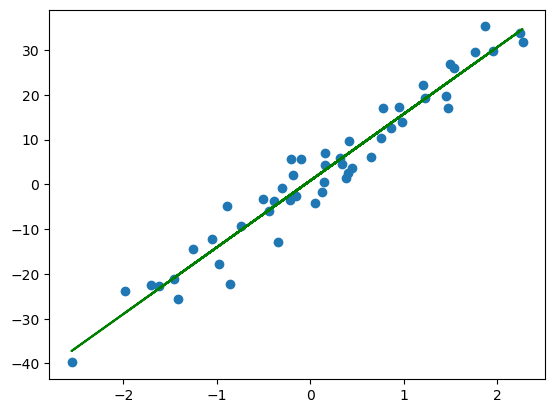

In [16]:
ex2_z = np.polyfit(ex2_x, ex2_y, 1)
ex2_p = np.poly1d(ex2_z)
plt.scatter(ex2_x, ex2_y)
plt.plot(ex2_x, ex2_p(ex2_x), 'g-')
plt.show()

We can see the equation for this line:

In [17]:
print(ex2_p)

 
14.91 x + 0.8568


We can also evaluate that line at any input value, as follows:

In [18]:
ex2_p(1)

15.765129888491021

## Polynomial Linear Regression

Sometimes we have data that does not fit along a line, but rather along a curve.  Before we start, let's build a convenience function that will perform an analysis on our data:

In [19]:
def poly_regress(x_data, y_data, degree) :
    z = np.polyfit(x_data, y_data, degree)
    p = np.poly1d(z)
    yhat_data = p(x_data)
    plt.scatter(x_data, y_data)
    plt.plot(x_data, yhat_data, 'b-')
    plt.show()
    print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat_data, y_data)):.2f}')
    print('Formula:\n', p)

Consider the following dataset:

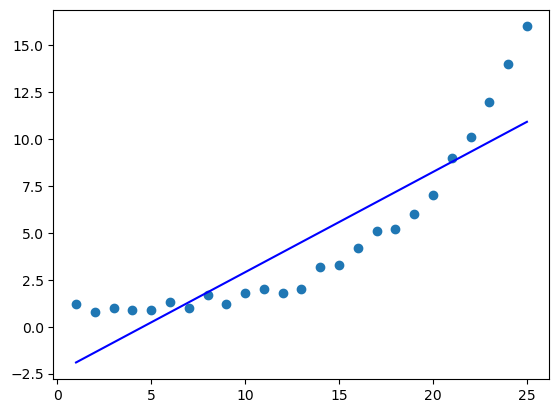

Mean-square error: 2.03
Formula:
  
0.5343 x - 2.438


In [20]:
x_a = range(1, 26)
y_a = [1.2, 0.8, 1, 0.9, 0.9, 1.3, 1, 1.7, 1.2, 1.8, 2, 1.8, 2, 3.2, 3.3, 4.2, 5.1, 5.2, 6, 7, 9, 10.1, 12, 14, 16]
poly_regress(x_a, y_a, 1)

As we can see, the straight line does a really poor job of fitting the set of data points.  Visually we see the mismatch, and the mean-square error is pretty bad.  _Note that this number is a lot smaller than the numbers we saw above, but that is not a surprise, since the numbers in this curve are a lot smaller._

With that evaluation, we were using a polynomial of degree 1.  Recall that the degree of a polynomial is the exponent of the largest power of _x_.  Consequently, our polynomial looked like this:

$$ y = \Omega_0 + \Omega_1 x^1 $$

Now let's try a polynomial of degree 2, which is a parabola.  The polynomial will look like this:

$$ y = \Omega_0 + \Omega_1 x^1 + \Omega_2 x^2 $$

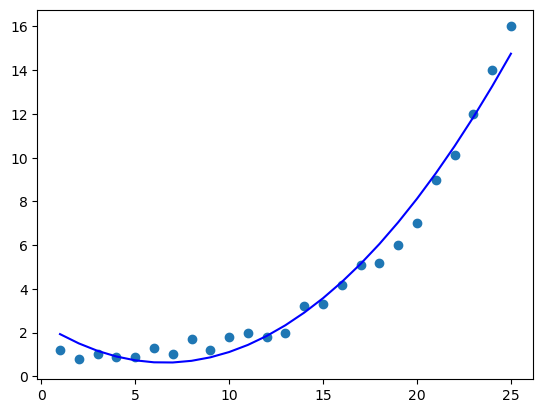

Mean-square error: 0.61
Formula:
          2
0.04169 x - 0.5498 x + 2.44


In [21]:
poly_regress(x_a, y_a, 2)

That is looking a lot better!  The line (curve) follows the points a lot better, and the error is a lot smaller.

Feeling quite happy about these results, we next try using a third-degree polynomial:

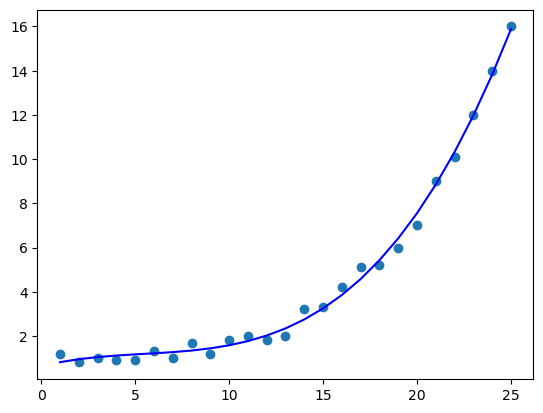

Mean-square error: 0.29
Formula:
          3           2
0.00184 x - 0.03005 x + 0.2111 x + 0.6323


In [22]:
poly_regress(x_a, y_a, 3)

That is looking even better!  The error has gone down even more, and the line is a much closer match to the points.

So let's try a fourth-degree polynomial:

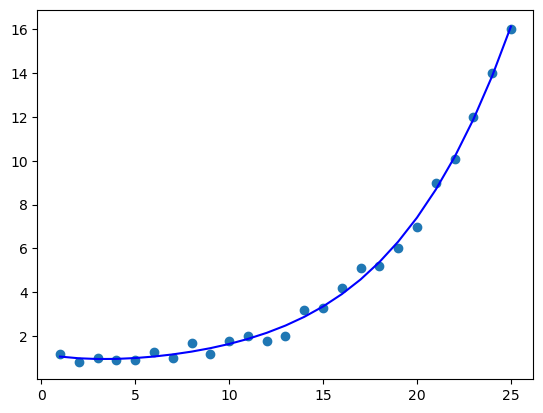

Mean-square error: 0.26
Formula:
            4            3           2
6.984e-05 x - 0.001792 x + 0.03148 x - 0.1611 x + 1.201


In [23]:
poly_regress(x_a, y_a, 4)

This is only a slight improvement over the third-degree polynomial, so perhaps we have gone far enough.  Also note that the leading coefficient is really small, hinting that this term is not strongly influencing the result.

These examples were following a simple curve.  Let's try a curve with an inflection point:

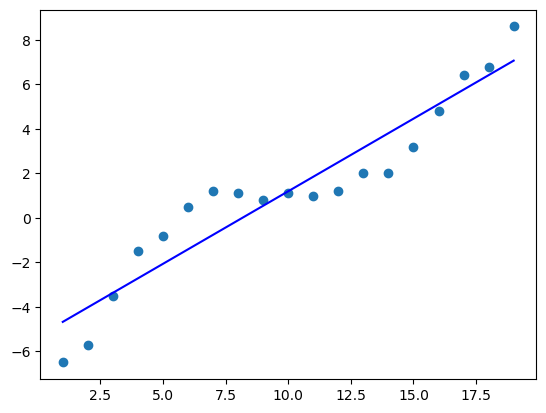

Mean-square error: 1.25
Formula:
  
0.6523 x - 5.328


In [24]:
x_b = range(1, 20)
y_b = [-6.5, -5.7, -3.5, -1.5, -0.8, .5, 1.2, 1.1, .8, 1.1, 1, 1.2, 2, 2, 3.2, 4.8, 6.4, 6.8, 8.6]
poly_regress(x_b, y_b, 1)

As before, not too good.  Degree 2:

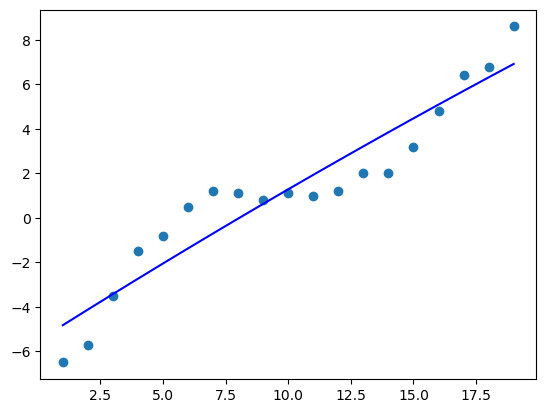

Mean-square error: 1.25
Formula:
            2
-0.002934 x + 0.711 x - 5.533


In [25]:
poly_regress(x_b, y_b, 2)

What!  The result is the same!  What happened?

OK, the result is not exactly the same, we can see in the formula that there is a small influence by the leading term.  But the error didn't improve.

The problem is, there is no parabola that fits this set of points (OK, technically, yes there is, but not really).

Let's move on to the third degree:

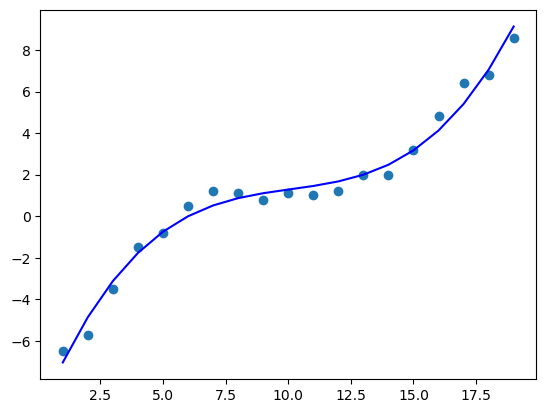

Mean-square error: 0.49
Formula:
           3          2
0.009057 x - 0.2746 x + 2.941 x - 9.718


In [26]:
poly_regress(x_b, y_b, 3)

Now we're doing pretty good.  The curve really seems to fit the points, and the error has gone way down.

4th degree:

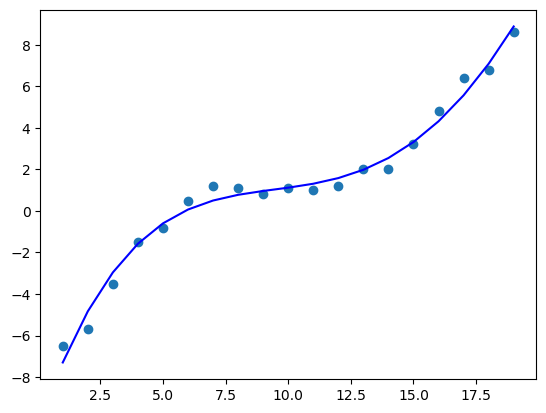

Mean-square error: 0.47
Formula:
             4           3          2
-0.0002431 x + 0.01878 x - 0.4019 x + 3.541 x - 10.46


In [27]:
poly_regress(x_b, y_b, 4)

Again, not much of an improvement.  We should stick with a third-degree polynomial.

Let's try another curve, a little more complex:

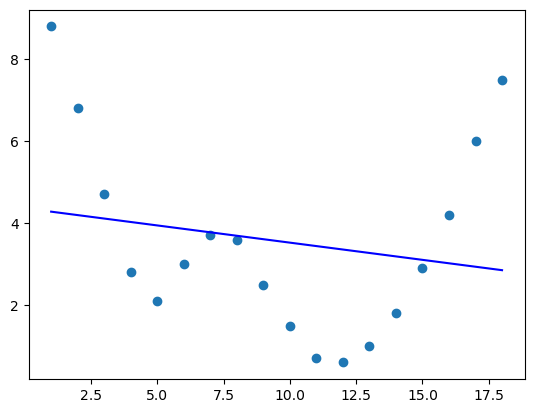

Mean-square error: 2.27
Formula:
  
-0.084 x + 4.365


In [28]:
x_c = range(1, 19)
y_c = [8.8, 6.8, 4.7, 2.8, 2.1, 3, 3.7, 3.6, 2.5, 1.5, 0.7, 0.6, 1.0, 1.8, 2.9, 4.2, 6, 7.5]
poly_regress(x_c, y_c, 1)

Nope!  2nd-degree:

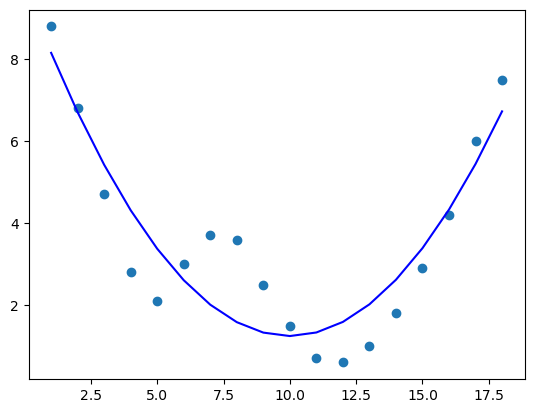

Mean-square error: 0.99
Formula:
          2
0.08549 x - 1.708 x + 9.779


In [29]:
poly_regress(x_c, y_c, 2)

Better, but needs some work!

3rd degree:

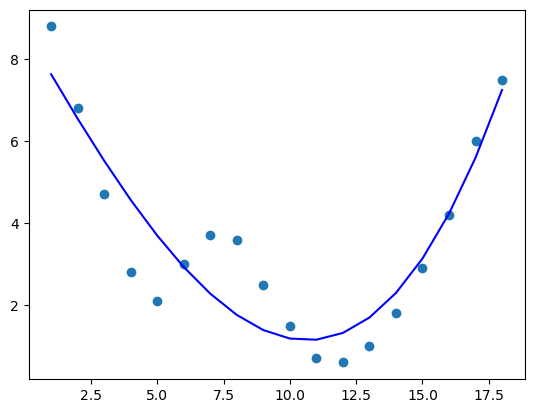

Mean-square error: 0.95
Formula:
          3           2
0.00256 x + 0.01253 x - 1.139 x + 8.758


In [30]:
poly_regress(x_c, y_c, 3)

This looks a lot like the last solution.  There is not a good fit for a 3rd degree polynomial.  4th?

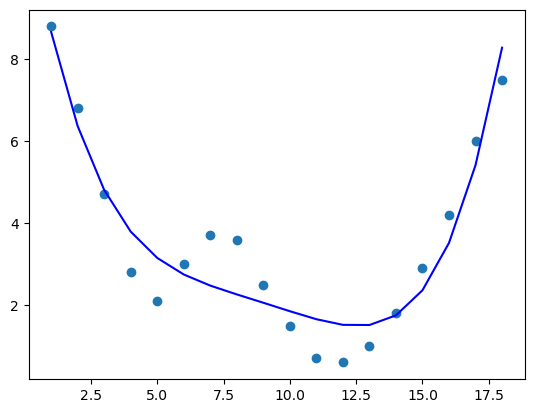

Mean-square error: 0.73
Formula:
           4           3          2
0.001264 x - 0.04548 x + 0.6105 x - 3.829 x + 11.93


In [31]:
poly_regress(x_c, y_c, 4)

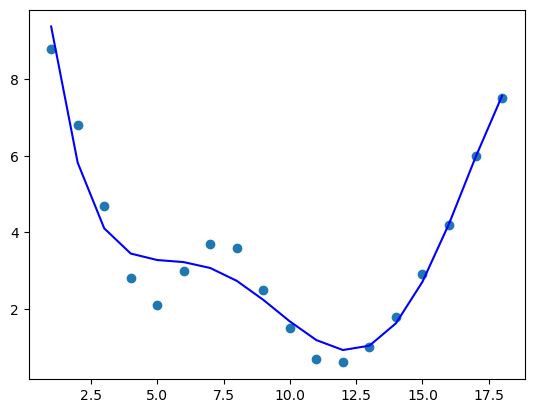

Mean-square error: 0.54
Formula:
             5           4         3         2
-0.0002425 x + 0.01278 x - 0.243 x + 2.081 x - 8.285 x + 15.81


In [32]:
poly_regress(x_c, y_c, 5)

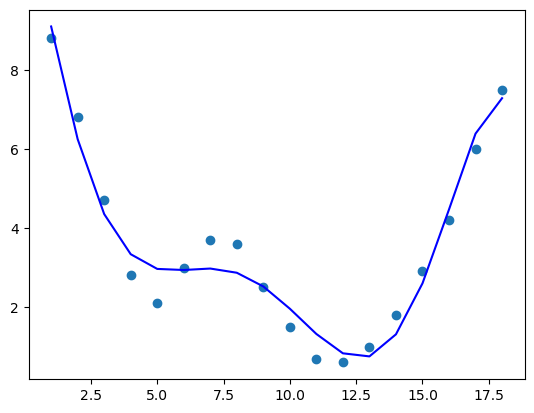

Mean-square error: 0.47
Formula:
             6            5           4          3           2
-2.977e-05 x + 0.001454 x - 0.02433 x + 0.1465 x + 0.08521 x - 3.808 x + 12.69


In [33]:
poly_regress(x_c, y_c, 6)

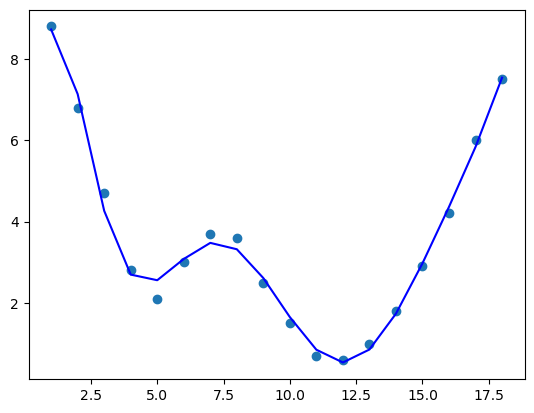

Mean-square error: 0.21
Formula:
             8             7            6           5          4
-6.998e-07 x + 6.417e-05 x - 0.002429 x + 0.04883 x - 0.5573 x
          3         2
 + 3.577 x - 11.89 x + 16.04 x + 1.51


In [34]:
poly_regress(x_c, y_c, 8)

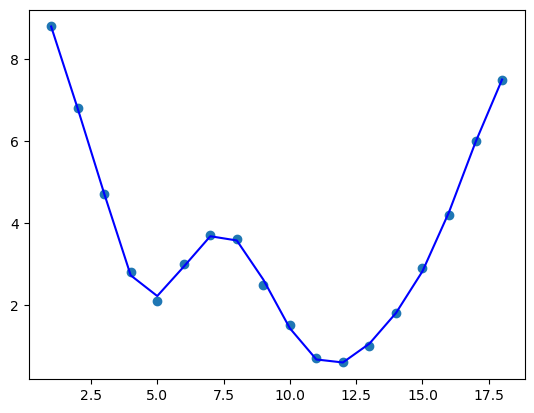

Mean-square error: 0.06
Formula:
            10             9             8            7           6
4.758e-08 x  - 4.825e-06 x + 0.0002104 x - 0.005146 x + 0.07731 x
          5         4         3         2
 - 0.734 x + 4.373 x - 15.77 x + 32.45 x - 36.04 x + 24.45


In [35]:
poly_regress(x_c, y_c, 10)

OK, we finally got a nice fit to the curve.  The problem is, if we use a polynomial of too high a degree, we are _overfitting_ the data, we are matching the variance of the data, rather than the general trend of the data.  Consider the following data:

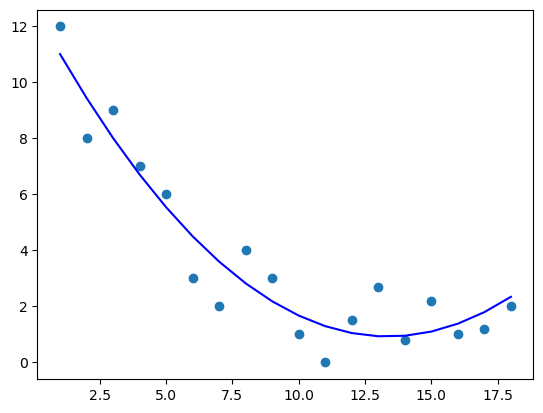

Mean-square error: 1.01
Formula:
          2
0.06598 x - 1.764 x + 12.71


In [36]:
x_d = range(1, 19)
y_d = [12, 8, 9, 7, 6, 3, 2, 4, 3, 1, 0, 1.5, 2.7, .8, 2.2, 1, 1.2, 2]
poly_regress(x_d, y_d, 2)

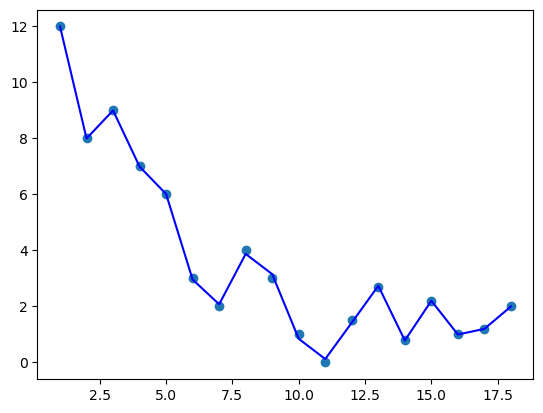

Mean-square error: 0.07
Formula:
             16            15             14             13
-1.041e-10 x  + 1.56e-08 x  - 1.072e-06 x  + 4.473e-05 x 
             12           11          10         9         8         7
 - 0.001266 x  + 0.02574 x  - 0.3876 x  + 4.401 x - 37.94 x + 248.4 x
         6        5             4             3             2
 - 1226 x + 4496 x - 1.194e+04 x + 2.208e+04 x - 2.659e+04 x + 1.846e+04 x - 5476


In [37]:
poly_regress(x_d, y_d, 16)

We probably would prefer the first solution, which generally matched the shape of the curve, rather than the second solution, which directly connected each of the points.  That second solution also captured and reproduced the 'noise'.

If we think back to our first cases, we noticed that for a while we were getting big reductions in the error measurement, but that after a point, the error measure didn't change by much.  This is a typical pattern.

We can pursue a new direction here: Why don't we graph the error as a function of the degree of the polynomial.
However, before we do, let's turn off the warnings.  Why?  In the following, we are going to ask polyfit to run over a wide range of degrees, and when we give really large degree, it prints a warning message about polyfit being poorly conditioned.

In [38]:
import warnings 
warnings.filterwarnings("ignore")

So now we implement, then run, a routine to test out various degrees of polynomial.

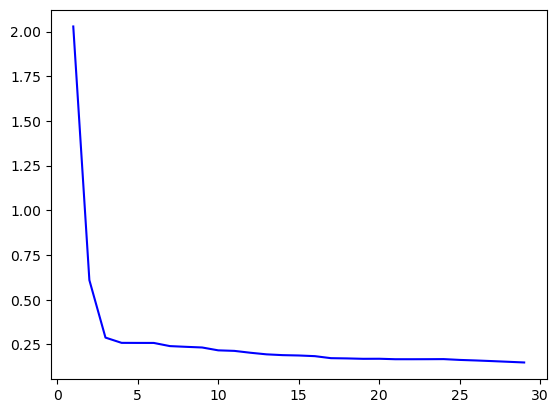

In [39]:
def map_degree(x_data, y_data) :
    num_degrees = 30
    scores = []
    rng = range(1, num_degrees)
    for degree in rng:
        z = np.polyfit(x_data, y_data, degree)
        p = np.poly1d(z)
        yhat_data = p(x_data)
        scores.append(np.sqrt(mean_squared_error(yhat_data, y_data)))
    plt.plot(rng, scores, 'b-')


map_degree(x_a, y_a)

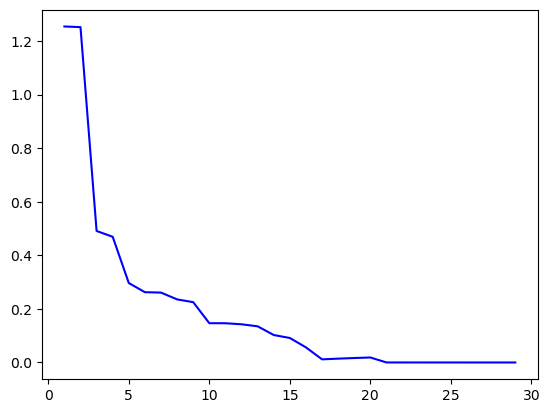

In [40]:
map_degree(x_b, y_b)

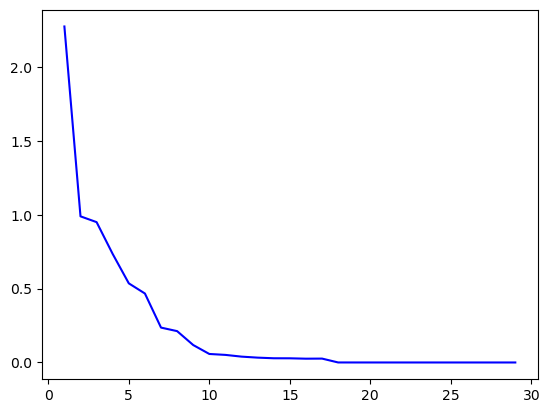

In [41]:
map_degree(x_c, y_c)

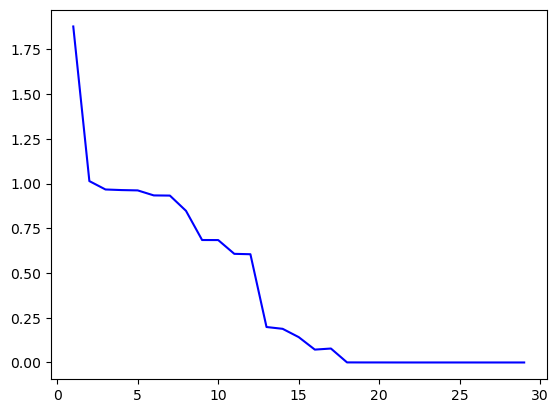

In [42]:
map_degree(x_d, y_d)

These graphs show that there is a "knee" (or is it "elbow").  Before the elbow the error rate is rapidly dropping.  After that, it tapers off a bit.  Yes, the formula gets more accurate past that point, but that is because of overfitting.

## Building Larger Test Cases

In the previous section, we built toy examples, we hand-generated small lists of samples.  With a very limited number of samples, we couldn't do our normal train/test split of the data, so we could see how well the prediction worked on unseen examples.

So let's write a function that will generate polynomial test cases for us.  This function should take the following values:
* Coefficients for $ x^3, x^2, x^1 $ and $ x^0 $.
* A factor for the randomness of the values
* The number of points to generate
* The low and high limits for the _x_ coordinates
This function will return a DataFrame with two columns, the _x_ values and the corresponding _y_ values.

In [43]:
def make_poly_regression_test(num_samples, x3coef, x2coef, x1coef, x0coef, random_factor, low_x, high_x) :
    x_vals = []
    y_vals = []
    for i in range(num_samples) :
        x = np.random.random() * (high_x - low_x) + low_x
        y0 = x * (x1coef + x * (x2coef + x * x3coef)) + x0coef
        y = y0 + np.random.randn() * random_factor
        x_vals.append(x)
        y_vals.append(y)
    return pd.DataFrame({'x': x_vals, 'y': y_vals}).sort_values(by = 'x', ascending = True)

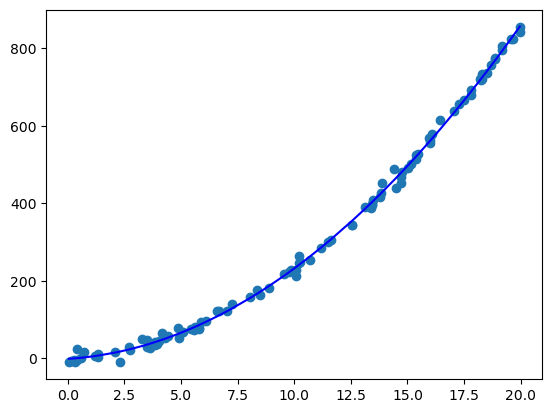

Mean-square error: 10.36
Formula:
       2
1.97 x + 3.636 x - 1.446


In [44]:
df = make_poly_regression_test(100, 0, 2, 3, 1, 10, 0, 20)
poly_regress(df.x, df.y, 2)

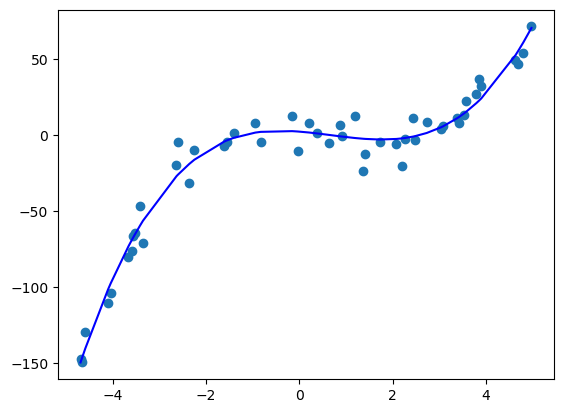

Mean-square error: 8.67
Formula:
        3         2
1.096 x - 2.234 x - 2.416 x + 2.26


In [45]:
df = make_poly_regression_test(50, 1, -2, 0, 2.5, 10, -5, 5)
poly_regress(df.x, df.y, 3)

Here we can see tests with a lot more data points, and we can see that the resulting formulas are fairly close to the actual generating formulas (at least the more significant terms, with the larger coefficients, are really close).

## Using Sklearn

Numpy's _polyfit_ works nicely for the cases we used above, but perhaps we should learn how to use the sklearn _LinearRegression_ method as well.

Here is one difference between the two:

* _polyfit_ is designed to fit polynomials of a specified degree.  So given just the _x_ inputs, _polyfit_ will also compute the $ x^2 $ values, $ x^3 $ values, and so on, as needed based on the degree.

* _LinearRegression_ is to handle multiple _features_ (input values), but only the single power of these features.

To use _LinearRegression_ to fit a polynomial curve, we've got a problem.

Luckily, there is a solution.  All we need to do, to fit a third-degree polynomial, is create two extra input columns in our DataFrame.  We started with the one column, containing the _x_ values.  We now need a second column filled with the square of the _x_ values, and a third column filled with the cube of the _x_ values.  _LinearRegression_ can then pick scaling factors for these three inputs, resulting in a polynomial fit!

To make these extra columns, sklearn has a method called _PolynomialFeatures_.  Using this method is a two step process:

1. Call _PolynomialFeatures_, passing in the desired degree of the polynomial.  This will return a generator.

2. Call the generator, passing in the array of _x_ values.  This will return a 2-dimensional array, where the first column is the _x_ values, the second column is the $ x^2 $ values, and so on.

Let's use this on our *x_b* data from above:

In [46]:
x_b

range(1, 20)

This is a _range_ object, but we want an array.  Numpy has a method for creating an array from a range:

In [47]:
np.array(x_b)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

Getting back to PolynomialFeatures, let's create a generator that has a degree of 3 (for the *x_b* example, we want a polynomial of degree 3).  This function also takes a second parameter, *include_bias*, which we should always set to False (for linear regression, we don't want a 'constant term', the $x^0$ value):

In [48]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
poly

PolynomialFeatures(degree=3, include_bias=False)

We can now run that generator to build our 'input array' for the linear regression, having columns for _x_, $x^2$, and $x^3$:

In [49]:
x_b_arr = poly.fit_transform(np.array(x_b).reshape(-1,1))
x_b_arr

array([[1.000e+00, 1.000e+00, 1.000e+00],
       [2.000e+00, 4.000e+00, 8.000e+00],
       [3.000e+00, 9.000e+00, 2.700e+01],
       [4.000e+00, 1.600e+01, 6.400e+01],
       [5.000e+00, 2.500e+01, 1.250e+02],
       [6.000e+00, 3.600e+01, 2.160e+02],
       [7.000e+00, 4.900e+01, 3.430e+02],
       [8.000e+00, 6.400e+01, 5.120e+02],
       [9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+01, 1.000e+02, 1.000e+03],
       [1.100e+01, 1.210e+02, 1.331e+03],
       [1.200e+01, 1.440e+02, 1.728e+03],
       [1.300e+01, 1.690e+02, 2.197e+03],
       [1.400e+01, 1.960e+02, 2.744e+03],
       [1.500e+01, 2.250e+02, 3.375e+03],
       [1.600e+01, 2.560e+02, 4.096e+03],
       [1.700e+01, 2.890e+02, 4.913e+03],
       [1.800e+01, 3.240e+02, 5.832e+03],
       [1.900e+01, 3.610e+02, 6.859e+03]])

Now that we have these input columns, we can perform the LinearRegression:

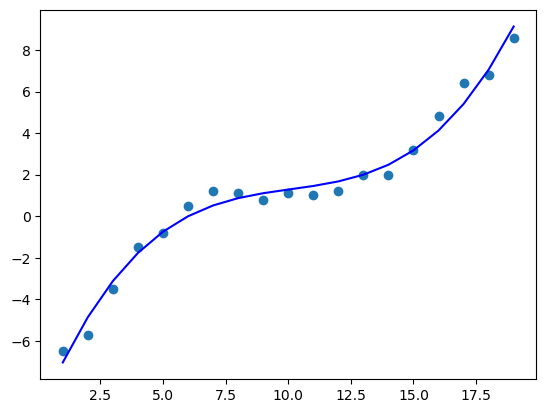

Mean-square error: 0.49


In [50]:
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(x_b_arr, y_b)
y_b_predicted = poly_reg_model.predict(x_b_arr)
plt.scatter(x_b, y_b)
plt.plot(x_b, y_b_predicted, 'b-')
plt.show()
print(f'Mean-square error: {np.sqrt(mean_squared_error(y_b_predicted, y_b)):.2f}')

Recalling the _polyfit_ solution, we see the similarities:

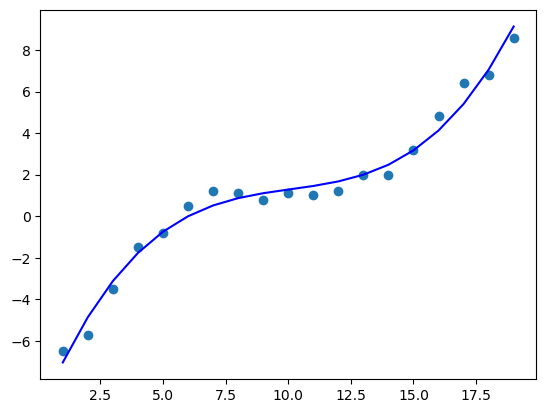

Mean-square error: 0.49
Formula:
           3          2
0.009057 x - 0.2746 x + 2.941 x - 9.718


In [51]:
poly_regress(x_b, y_b, 3)

Using sklearn was a bit more work, we needed to build the _PolynomialFeatures_, so there was a little more to keep track of.  But we will next see where the sklearn approach is quite useful.

## Multiple Linear Regressions (Multiple Inputs)

We will now build a dataset that has two inputs (features), but one of these does not strongly influence the output.  In other words, this input is some extraneous data that might simply confuse the regression.  This is a very common practice, as in real life, when we approach a dataset, we do not necessarily know which of the inputs really matter (at least for the particular output we are examining).

For the following, we build a regression dataset.  This will have two features, but only one is informative (influences the output):

In [52]:
mlr_n_samples = 50
mlr_x, mlr_y, mlr_coef = datasets.make_regression(
    n_samples = mlr_n_samples,
    n_features = 2,
    n_informative = 1,
    noise = 2,
    coef = True,
    random_state = 0,
)

The *mlr_x* result is a 2-dimensional array, containing the two input columns, and *mlr_y* is the output column.  For convenience we convert the input data into a DataFrame:

In [53]:
mlr_df = pd.DataFrame(mlr_x, columns = ['In1', 'In2'])
mlr_df

,In1,In2
0,0.465662,-1.536244
1,0.978738,2.240893
2,1.488252,1.895889
3,-0.907298,0.051945
4,0.356366,0.706573
5,-1.630198,0.462782
6,-1.070753,1.054452
7,0.154947,0.378163
8,-1.252795,0.777490
9,0.045759,-0.187184


Let's perform a Linear Regression using both of the two input values.  After we have finished the regression, we will plot the results using the 'In1' data (the informational data) for the x-coordinate, and then we will also plot the results using the 'In2' data:

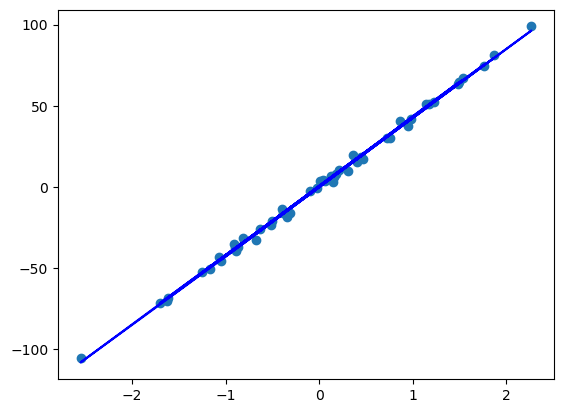

In [54]:
model1 = linear_model.LinearRegression()
model1.fit(mlr_df, mlr_y)
yhat = model1.predict(mlr_df)
plt.scatter(mlr_df.In1, mlr_y)
plt.plot(mlr_df.In1, yhat, 'b-')
plt.show()

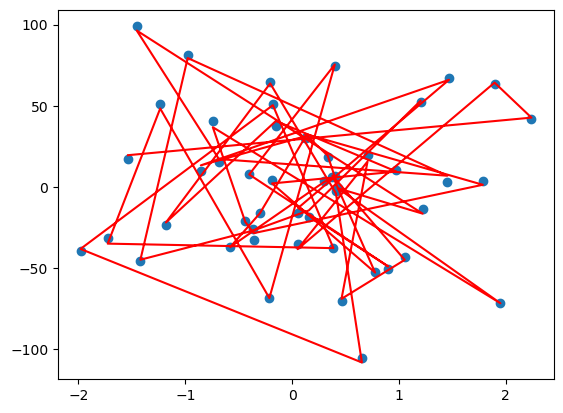

In [55]:
plt.scatter(mlr_df.In2, mlr_y)
plt.plot(mlr_df.In2, yhat, 'r-')
plt.show()

Well, this was surprising.  First of all, the 'In2' data is all over the map, it does not correlate with the 'In1' data nor with the 'Output' data.  Also, it was not sorted, so the lines go all over the place!

We can do a quick sanity check: We can perform a linear regression using only In1, ignoring In2.  And then we can perform another linear regression using only In2, ignoring In1.  First, some code:

In [56]:
def sk_regress(x_data, y_data, degree) :
    model = linear_model.LinearRegression()
    poly = PolynomialFeatures(degree = degree, include_bias = False)
    x_data_arr = poly.fit_transform(np.array(x_data).reshape(-1,1))
    model.fit(x_data_arr, y_data)
    yhat = model.predict(x_data_arr)
    plt.scatter(x_data, y_data)
    plt.plot(x_data, yhat, 'b-')
    plt.show()
    print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat, y_data)):.2f}')

We now run a regression using only In1:

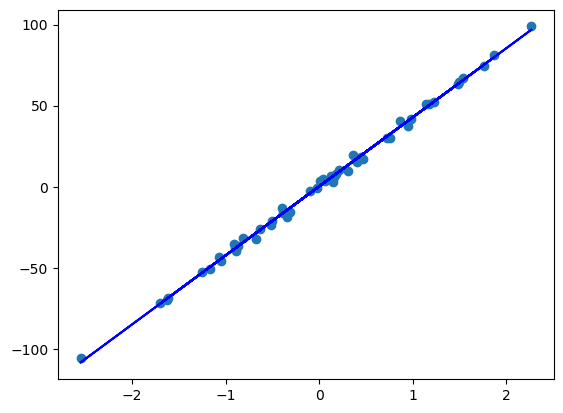

Mean-square error: 2.09


In [57]:
sk_regress(mlr_df.In1, mlr_y, 1)

That was what we expected, the results look good.  Now perform the regression using only In2:

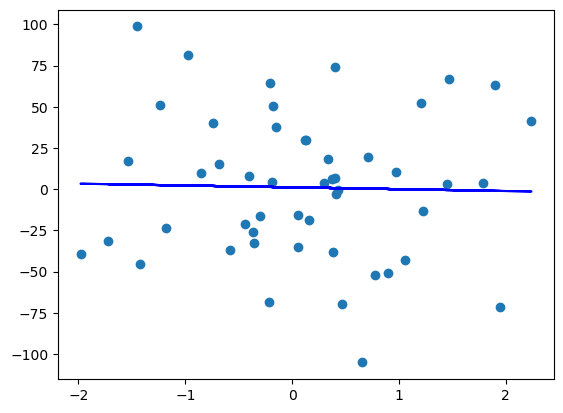

Mean-square error: 43.81


In [58]:
sk_regress(mlr_df.In2, mlr_y, 1)

This is also what we would expect: there is no really great correlation between In2 and the output value.

So we have seen how the linear regression can have some extraneous input: the linear regression basically ignores this data.  Actually, the formula does consider this data, but the coefficient is really low.

Here is one other thing to consider: What if the output really _did_ depend upon both of the input values?  In a more general case, there may be many input values, some of which should be ignored, and some should be used.  But in the simpler case, let's build a problem where the output depends upon two input values (and not upon a third):

In [59]:
mlr2_n_samples = 100
mlr2_x, mlr2_y, mlr2_coef = datasets.make_regression(
    n_samples = mlr2_n_samples,
    n_features = 3,
    n_informative = 2,
    noise = 2,
    coef = True,
    random_state = 0,
)
mlr2_df = pd.DataFrame(mlr2_x, columns = ['In1', 'In2', 'In3'])
model2 = linear_model.LinearRegression()
model2.fit(mlr2_df, mlr2_y)
yhat2 = model2.predict(mlr2_df)

OK, not so exciting (but theoretically all of the work has been done).

Let's view the scatterplots of each input vs the output:

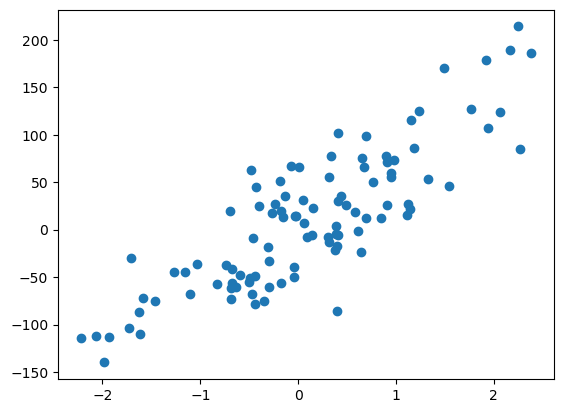

In [60]:
plt.scatter(mlr2_df.In1, mlr2_y)
plt.show()

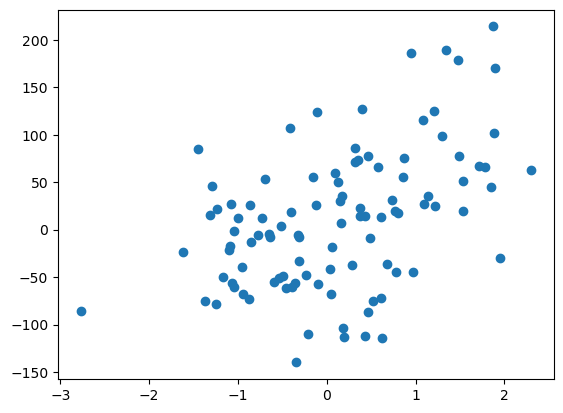

In [61]:
plt.scatter(mlr2_df.In2, mlr2_y)
plt.show()

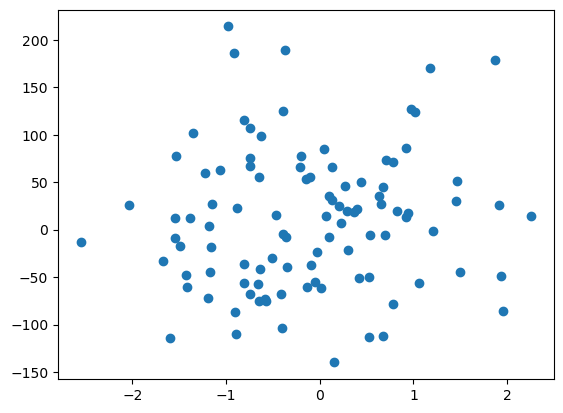

In [62]:
plt.scatter(mlr2_df.In3, mlr2_y)
plt.show()

So each of the plots is really spread out.  In1 is a little reasonable.  But the error rate will probably be quite high.  Let's see:

In [63]:
print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat2, mlr2_y)):.2f}')

Mean-square error: 1.82


Wow, that is really a small error!  Let's try doing independent regressions using each of the input values:

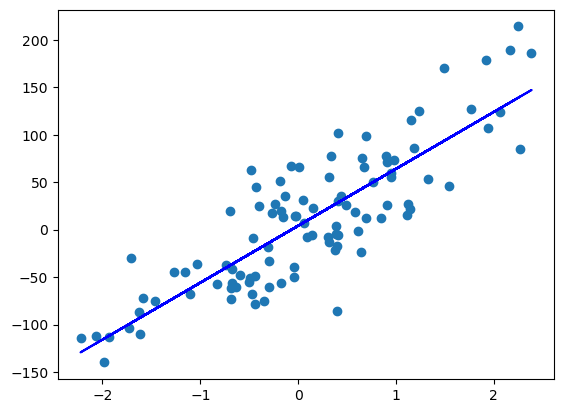

Mean-square error: 39.11


In [64]:
sk_regress(mlr2_df.In1, mlr2_y, 1)

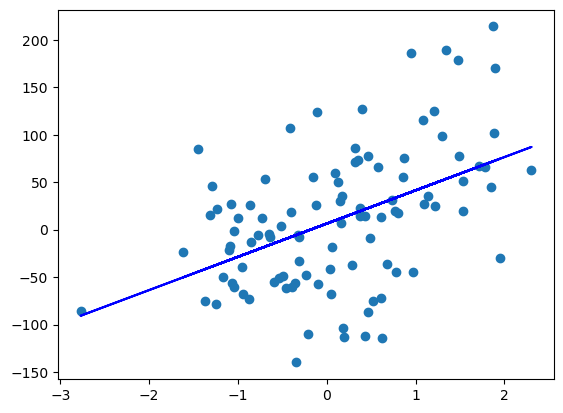

Mean-square error: 64.30


In [65]:
sk_regress(mlr2_df.In2, mlr2_y, 1)

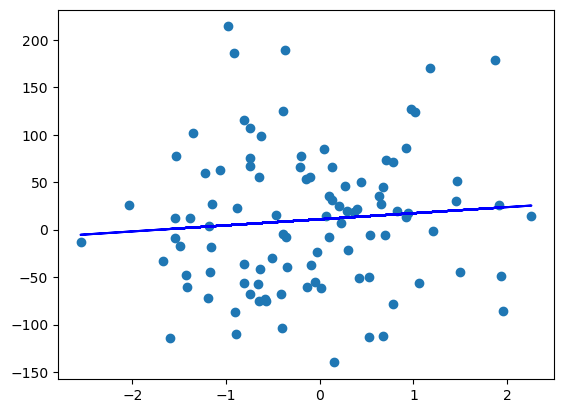

Mean-square error: 72.65


In [66]:
sk_regress(mlr2_df.In3, mlr2_y, 1)

The results are much like we would expect just looking at the scatterplots.  The output is not correlated with any _single_ input value, but _is_ highly correlated with the combination of In1 and In2, and is independent of In3.  We can print the coefficients that were used by the generator to check our results:

In [67]:
print(mlr2_coef)

[62.88984391 39.84342586  0.        ]


## Sparse Data

Often in real-world data, there are uninformative variables in the data (features which don't markedly affect the output).  With these data in the dataset, the regression will try to use these values to help fit the samples.  Usually the simpler model is preferred.

For this section, we are going to build a dataframe that has some 'non-informative' features.  These are columns that do not actually affect the target (output).  _Note: while these extra columns do not 'actually' affect the output, the regression algorithms will try to fit these values in.  Consequently, the algorithm may find some effect, but it is usually very small, and is just due to the nature of random values!_

In the following we build a dataframe that has 8 features, but only 5 of them are informative.  We don't know which columns are which!

In [68]:
mlr3_n_samples = 500
mlr3_x, mlr3_y, mlr3_coef = datasets.make_regression(
    n_samples = mlr3_n_samples,
    n_features = 8,
    n_informative = 5,
    noise = 5,
    coef = True,
    random_state = 0,
)
mlr3_df = pd.DataFrame(mlr3_x, columns = ['In1', 'In2', 'In3', 'In4', 'In5', 'In6', 'In7', 'In8'])

This dataframe, **mlr3_df**, contains all of the input data.  Sometimes we want just the input data.  But other times we also want the output data to be part of the same dataframe.  So we will make a new dataframe, **mlr3_full_df**, that also contains the output data.

In [69]:
mlr3_full_df = mlr3_df.copy()
mlr3_full_df['Result'] = mlr3_y

For our first visualization, let's plot a bar graph of the output value, and also some of the input values:

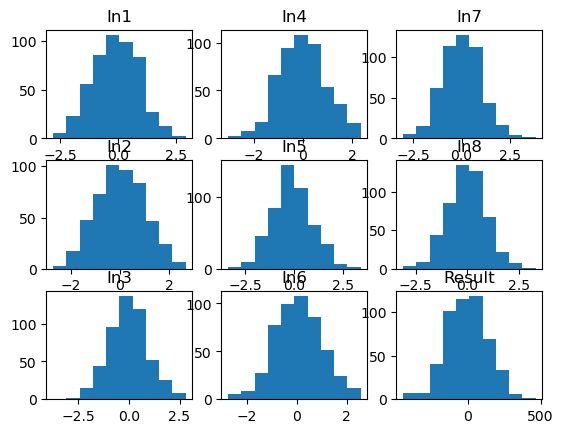

In [70]:
fig, axs = plt.subplots(3, 3)
axs[0,0].hist(mlr3_full_df.In1)
axs[0,0].set_title('In1')
axs[1,0].hist(mlr3_full_df.In2)
axs[1,0].set_title('In2')
axs[2,0].hist(mlr3_full_df.In3)
axs[2,0].set_title('In3')
axs[0,1].hist(mlr3_full_df.In4)
axs[0,1].set_title('In4')
axs[1,1].hist(mlr3_full_df.In5)
axs[1,1].set_title('In5')
axs[2,1].hist(mlr3_full_df.In6)
axs[2,1].set_title('In6')
axs[0,2].hist(mlr3_full_df.In7)
axs[0,2].set_title('In7')
axs[1,2].hist(mlr3_full_df.In8)
axs[1,2].set_title('In8')
axs[2,2].hist(mlr3_full_df.Result)
axs[2,2].set_title('Result')
plt.show()

Well, this doesn't tell us a whole lot.  All of the features, and the target, follow basically a bell curve.

Sometimes when we see a plot like this, we find that some values have a much different distribution, which could give us a clue about some further exploration.  But we see nothing remarkable about this data.

Seaborn has many interesting data visualization methods.  Check out the Seaboard documentation, they have a nice gallery showing representative diagrams.

The main visualization we will use now is the linear regression, using _lmplot_.  We pass in the dataset, indicate which columns to use on the two axes, and give the size of the plot.  We can use this to compare each of the input features to the target.

For the first chart, let's compare _In1_ with _Result_:

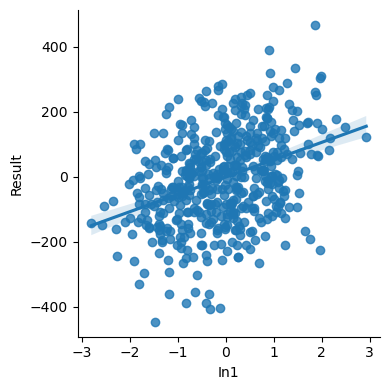

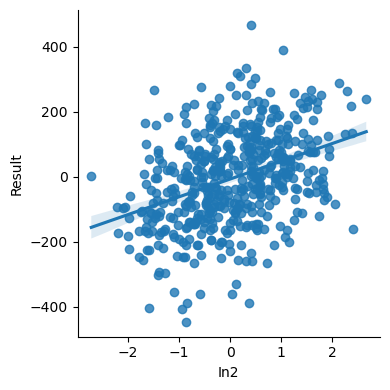

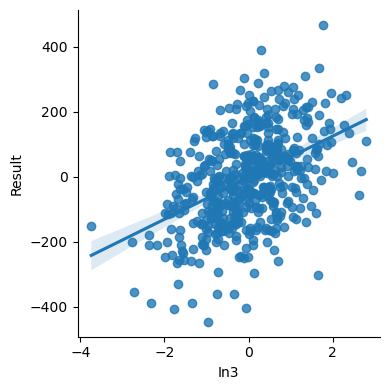

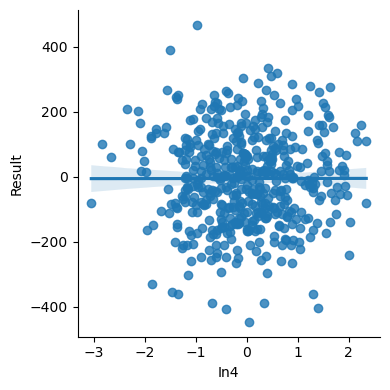

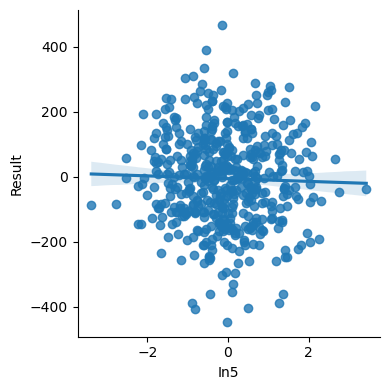

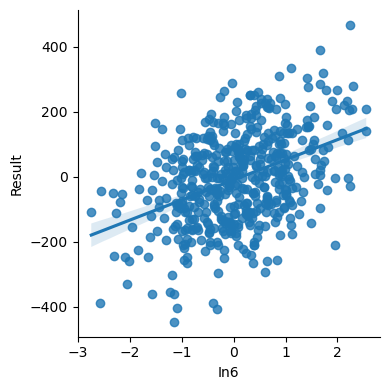

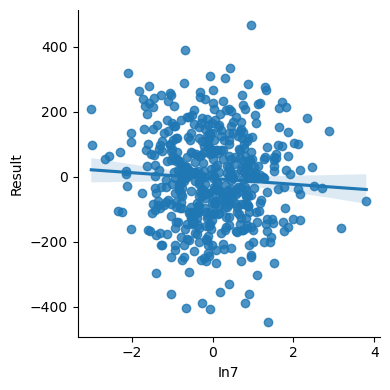

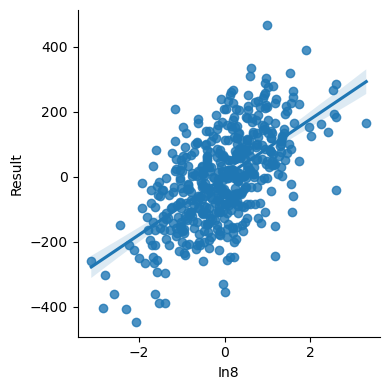

In [71]:
sns.lmplot(data=mlr3_full_df, x="In1", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In2", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In3", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In4", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In5", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In6", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In7", y="Result", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In8", y="Result", height = 4, aspect = 1)
plt.show()

For these plots, the linear regression picked the best line to represent the data, but it is clear that the data is really spread out, so there is a very large standard deviation.

But we can get some clues.  Note that for features In1, In2, In3, In6, and In8, the data does tend to skew along an upward path, and indeed the linear regression result line does have a steeper slope.  However, for features In4, In5, and In7, the linear regression result line has a very small slope, the line is primarily horizontal.

We can see here which of the features have a reasonable effect on the target.

It should be noted that in all of the significant cases, the slope was a _positive_ value, the line sloped from lower left to upper right.  For some examples, a significant feature could result in a _negative_ slope.  This would also indicate an important feature.  Either a large positive correlation or a large negative correlation indicates a significant feature.

We can also look for correlations _between features_.  If we find a strong correlation between two of the features, this indicates that these are related, and perhaps we should remove one of these from the dataframe (one of the two is redundant, and having redundant features can confuse some of the analysis tools).

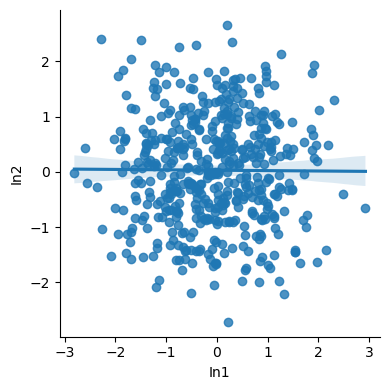

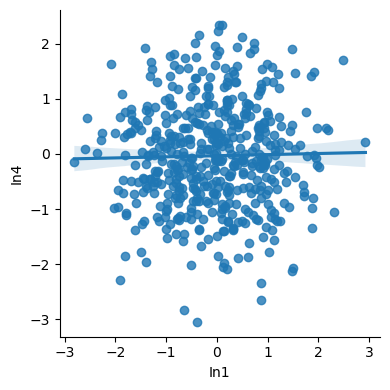

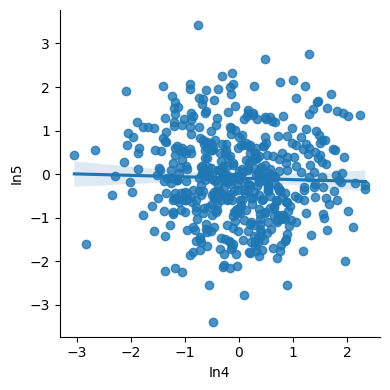

In [72]:
sns.lmplot(data=mlr3_full_df, x="In1", y="In2", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In1", y="In4", height = 4, aspect = 1)
sns.lmplot(data=mlr3_full_df, x="In4", y="In5", height = 4, aspect = 1)
plt.show()

In the above plots, I compared two of the more significant features, then a significant and insignificant feature, and then two insignificant features.  For the combinations I tried, there was very little correlation between the features.  It would be a bit of work to look for possible correlations between _all_ of the features!

## Heat Map

We did some preliminary investigation by performing regressions between some interesting input columns and our output value.  These might give us some idea of which inputs to include and which to exclude when performing a multi-variable regression.

Another approach to determine which inputs to use is to perform a correlation between the columns.  A correlation matrix checks all pairs of columns in the dataset, and for each pair computes the correlation.  If there is a strong correlation between one of the inputs and the output, then that is an input of interest.

A DataFrame can compute the correlation matrix, and Seaborn can plot a Heat Map based on that matrix.  In the following, we select some of the columns, then produce the Heat Map.  In a Heat Map, all pairs of features are compared, and a color is chosen indicating the degree of correlation.  For this, we will use the full dataframe, so that we have the target as well as all of the features, in the map.

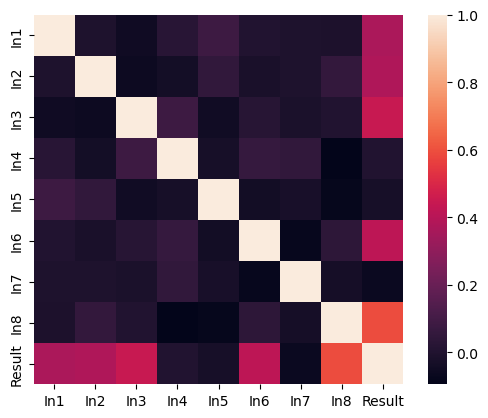

In [73]:
corrmat = mlr3_full_df.corr()
sns.heatmap(corrmat, square = True)
plt.show()

We can see right away in this plot that each feature is very highly correlated to itself!  All of the cells on the diagonal are white (indicating very high or perfect correlation).  But this tells us nothing!

Most of the array is showing us comparisons between the various input features.  None of these cells have very light coloring, indicating that there is not much correlation between the various inputs.  This is good, it indicates that we probably don't have redundant inputs.

Of more interest is the right column, or the bottom row (these are showing the same thing, they are just transposes of each other).  These cells give us the correlation between the features and the target.  Note:

* In8 has the brightest color.  This indicates that In8 has the greatest correlation to the target.  This is the most significant of the features.

* Also we see that In6 and In3 are fairly bright, so these are also important features.

* Next, In1 and In2 are also important, although not as much as In3, In6, or In8.

* In4, In5, and In7 are seen to have little correlation to the target.  Consequently, if we were going to remove some of the columns from consideration, these would be the ones.

As you can see, the Heat Map gives a quick overview of the relative importance of the various features.  Anything that really stands out in the Heat Map is easily identified as a more important feature.

## Scatter Plot

Another interesting visualization tool is a _scatter plot_.  For this, we first pick a small set of interesting columns.  We then build a new DataFrame containing just these columns (and our output _price_).  We then call the Pandas plotting *scatter_matrix* method:

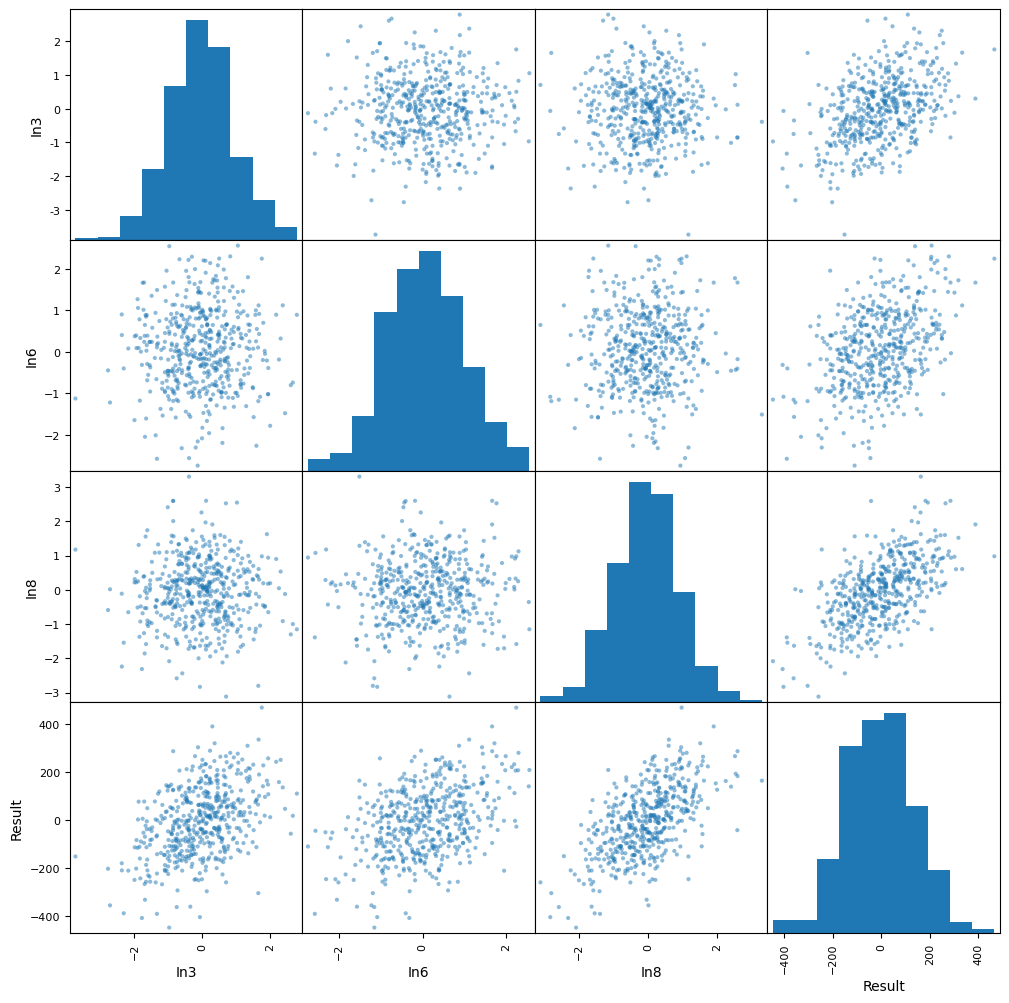

In [74]:
df3 = pd.DataFrame(mlr3_full_df.In3)
df3['In6'] = mlr3_full_df.In6;
df3['In8'] = mlr3_full_df.In8;
df3['Result'] = mlr3_full_df.Result;
pd.plotting.scatter_matrix(df3, figsize=(12.0, 12.0))
plt.show()

On the diagonal of this diagram, we would be comparing each column with itself.  Instead, the program prints a bar chart of that column.  But in all of the non-diagonal cells, the diagram shows a scatter plot of the two columns (the row's column and the column's column!).

In the cells along the right edge, and along the bottom edge, we get an overview of how each of the columns relates to the target.

However, in the other cells, we might find there is an interesting relationship between the two columns.

This is similar to the scatter plots we made above, but these are automatically generated.  On the other hand, in our previous approach, we saw the linear regression result line on each of the graphs.  Using the slopes of the lines we were able to determine the more important features of the dataframe.

We use these tools to help us find interesting relationships in the data.  There are usually multiple ways to achieve the same result: use whichever approach you like the best!

## LASSO

Up to now, we have only been looking at the _training data_.  Because of this, we have no idea how the _predictive_ calculations of the model perform.  In the past, we split the data into _training_ and _testing_ sets.  We trained with the training set, but predicted with the testing set.

We now do these steps.  Note here we have gone back to the dataframe that does _not_ include the target column, as we want to keep this column separate for the regression model.  We split the data set in half.

In [75]:
train_size = mlr3_df.shape[0]//4
x_train = mlr3_df[:train_size]
x_test = mlr3_df[train_size:]
y_train = mlr3_y[:train_size]
y_test = mlr3_y[train_size:]
print('Training and testing set sizes', x_train.shape, x_test.shape)

regr_mlr3 = linear_model.LinearRegression()
regr_mlr3.fit(x_train, y_train) 
print('Coeff and intercept:', regr_mlr3.coef_, regr_mlr3.intercept_)

# Best possible score is 1.0, lower values are worse.
print('Training Score:', regr_mlr3.score(x_train, y_train) )
print('Testing Score:', regr_mlr3.score(x_test, y_test) )
print('Training MSE: ', np.mean((regr_mlr3.predict(x_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_mlr3.predict(x_test) - y_test)**2))

Training and testing set sizes (125, 8) (375, 8)
Coeff and intercept: [57.76352048 55.36806918 69.12424187 -0.77153764  0.36542208 58.73232071
  0.28548583 84.06233095] -0.4116232701597582
Training Score: 0.9988246438469107
Testing Score: 0.9987516520244523
Training MSE:  22.955087590167956
Testing MSE:  25.53951748250711


It looks like the linear regression is doing a great job, with both the training and the test data.  Usually the results are not this striking!

Recall when we looked at the heat map, and in our other investigations, we found that some of the features were more highly correlated to the target than others.

If we look at the array of coefficients, the model considered _all_ of the input features.  For every column, there is a non-zero coefficient.  Yes, some are small, but they all have an influence.  And notice we see the same results: In8 has the highest effect, In6 and In3 are next, then In1 and In2.  Also, In4, In5, and In6 have negligible effect.

We can build a _sparse model_: we only consider some of the features, and the remaining features are ignored.  To do this we can create a _LASSO_ regressor (Least Absolute Shrinkage and Selection Operator), which forces some of the coefficients to zero.

In [76]:
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(x_train, y_train) 
print('Coeff and intercept:', regr_lasso.coef_,  regr_lasso.intercept_)

print('Training Score:', regr_lasso.score(x_train, y_train))
print('Testing Score:', regr_lasso.score(x_test, y_test))

print('Training MSE: ', np.mean((regr_lasso.predict(x_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_lasso.predict(x_test) - y_test)**2))

Coeff and intercept: [57.37871198 55.05552165 68.78409052 -0.45348247  0.19780022 58.28657849
  0.         83.79610931] -0.49128005457118107
Training Score: 0.998786667329677
Testing Score: 0.9987205653242668
Training MSE:  23.696781311835004
Testing MSE:  26.175509480260644


We can get a report ranking the features in order of importance, from least to greatest, as follows:

In [77]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important):', mlr3_df.columns[ind])

Order variable (from less to more important): Index(['In7', 'In5', 'In4', 'In2', 'In1', 'In6', 'In3', 'In8'], dtype='object')


## Select K Best

Another approach to finding the most important features is the _SelectKBest_ function from sklearn.

This function takes an input parameter, _k_, which indicates the number of features we wish to include.  The function's output is an array listing all of the features, each with a value of True (keep this one) or False (ignore this one).

In [78]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(x_train, y_train)
z = list(zip(selector.get_support(), mlr3_df.columns))
print('Selected features:', z)

Selected features: [(True, 'In1'), (True, 'In2'), (True, 'In3'), (False, 'In4'), (False, 'In5'), (True, 'In6'), (False, 'In7'), (True, 'In8')]


# Wrapup
We have looked at several approaches to analyze the data, to find which features are important and which can probably be removed.  With this dataset, the results were very clear.  In practice, scores will not be nearly this ideal!

You can use any of the techniques we looked at when performing your analysis.

Let's check to see 

In [79]:
model3 = linear_model.LinearRegression()
model3.fit(mlr3_df, mlr3_y)
yhat3 = model3.predict(mlr3_df)
print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat3, mlr3_y)):.2f}')

Mean-square error: 4.90


Now let's build a dataframe that removes In4, In5, and In7, then perform a regression:

In [80]:
df4 = pd.DataFrame(mlr3_df.In1)
df4['In2'] = mlr3_df.In2;
df4['In3'] = mlr3_df.In3;
df4['In6'] = mlr3_df.In6;
df4['In8'] = mlr3_df.In8;
model4 = linear_model.LinearRegression()
model4.fit(df4, mlr3_y)
yhat4 = model4.predict(df4)
print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat4, mlr3_y)):.2f}')

Mean-square error: 4.93


By eliminating these three features, the result is very close to the same.  Evidently those features had a very small impact on the value of the target.

Let's try another example where we eliminate one of relatively important features and replace it with one of the less signficant features:

In [81]:
df5 = pd.DataFrame(mlr3_df.In1)
df5['In2'] = mlr3_df.In2;
df5['In4'] = mlr3_df.In4;
df5['In6'] = mlr3_df.In6;
df5['In8'] = mlr3_df.In8;
model5 = linear_model.LinearRegression()
model5.fit(df5, mlr3_y)
yhat5 = model5.predict(df5)
print(f'Mean-square error: {np.sqrt(mean_squared_error(yhat5, mlr3_y)):.2f}')

Mean-square error: 67.36


Note that this has a much larger error!

Again, this is toy data.  In the real world, there will be a lot more variance in the values.  This means that the scores will not be nearly as high as what we have seen here.

Another thing that is very likely: removing the insignificant features may make the error actually decrease!  In these cases, the extra data was confusing the regressor.

## Conclusion

We've covered a lot of stuff.

Recall that linear regression is the most-used machine learning algorithm.

But there are several additional machine learning algorithms that we will be studying.